<a href="https://colab.research.google.com/github/allanurin/TUGGAS_PERCEPTRON/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
dataset_path = "/content/drive/MyDrive/Dataset/klasifikasiBuah"  # Sesuaikan dengan path dataset Anda

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 368 images belonging to 2 classes.
Found 92 images belonging to 2 classes.


In [ ]:

# arsitektur perceptron

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# kompilasi model

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
# latih model

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 124s 6s/step - accuracy: 0.5470 - loss: 5.1467 - val_accuracy: 0.4891 - val_loss: 1.8693
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.6665 - loss: 1.1075 - val_accuracy: 0.8804 - val_loss: 0.5462
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.8327 - loss: 0.4461 - val_accuracy: 0.9239 - val_loss: 0.3196
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.8829 - loss: 0.3070 - val_accuracy: 0.8804 - val_loss: 0.3042
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.8979 - loss: 0.2217 - val_accuracy: 0.9457 - val_loss: 0.2388
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.9197 - loss: 0.2081 - val_accuracy: 0.9457 - val_loss: 0.1924
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.9358 - loss: 0.1773 - val_accuracy: 0.9130 - val_loss: 0.1837
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9529 - loss: 0.1212 - val_accuracy: 0.9457 - val_loss

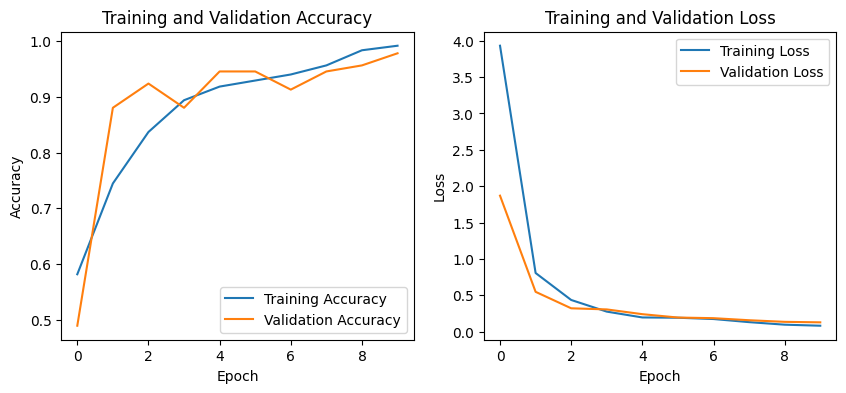

In [ ]:
# Plot Akurasi
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# evaluasi model

loss, acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {acc:.2f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.9735 - loss: 0.1376
Validation Accuracy: 0.98


In [ ]:
# simpan model

model.save("model_buah_perceptron.h5")


In [ ]:
pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
pip install --upgrade gradio


In [ ]:

import gradio as gr
import numpy as np
import tensorflow as tf
from PIL import Image

# Load the trained model
model = tf.keras.models.load_model("model_buah_perceptron.h5")

# Define class labels
class_labels = ["Pineapple", "Strawberry"]  # Urutkan sesuai dengan urutan encoding di dataset

# Define the prediction function
def predict_image(image):
    # Resize the image to match the model's input size
    image = image.resize((64, 64))
    # Convert the image to a numpy array and normalize it
    image_array = np.array(image) / 255.0
    # Add batch dimension
    image_array = np.expand_dims(image_array, axis=0)
    # Predict the class
    prediction = model.predict(image_array)
    class_index = int(prediction[0] >= 0.5)  # Threshold untuk klasifikasi biner
    confidence = float(prediction[0]) if class_index == 1 else float(1 - prediction[0])
    return class_labels[class_index], f"Confidence: {confidence:.2f}"

# Define the Gradio interface
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil", label="Unggah Gambar Buah"),
    outputs=[
        gr.Text(label="Klasifikasi"),
        gr.Text(label="Kepercayaan")
    ],
    title="Klasifikasi Buah dengan Perceptron",
    description="Unggah gambar buah (strawberry atau pineapple) untuk mendapatkan prediksi klasifikasinya."
)

# Launch the web app
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6c7741a5606dc9196e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
